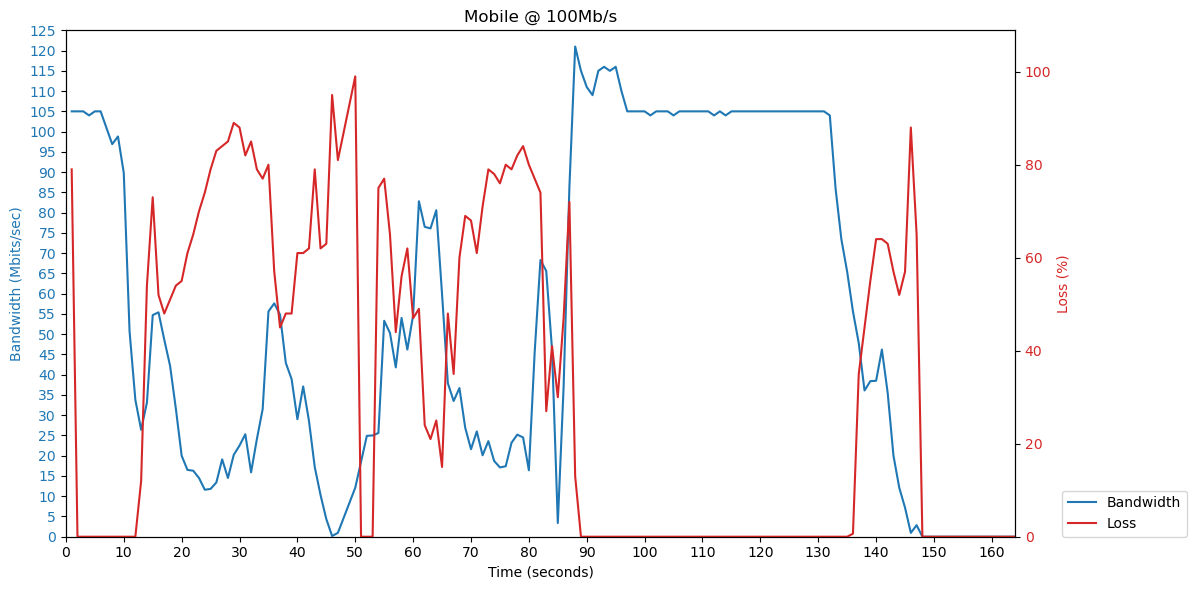

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Read the CSV file
df = pd.read_csv('latest100.csv')

# Extract the time from the Interval column
df['Time'] = df['Interval'].apply(lambda x: float(x.split('-')[1]))

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Bandwidth
color = 'tab:blue'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Bandwidth (Mbits/sec)', color=color)
bandwidth_line = ax1.plot(df['Time'], df['Bandwidth'], color=color, label='Bandwidth')
ax1.tick_params(axis='y', labelcolor=color)

# Set y-axis range for bandwidth
max_bandwidth = max(df['Bandwidth'])
bandwidth_max = 5 * (int(max_bandwidth / 5) + 1)  # Round up to nearest 5
ax1.set_ylim(0, bandwidth_max)
ax1.set_yticks(np.arange(0, bandwidth_max + 1, 5))

# Create a second y-axis for Loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss (%)', color=color)
loss_line = ax2.plot(df['Time'], df['Loss'], color=color, label='Loss')
ax2.tick_params(axis='y', labelcolor=color)

# Set y-axis range for loss
ax2.set_ylim(0, max(max(df['Loss']), 1) * 1.1)  # Set max to 110% of max loss or 1.1, whichever is greater

# Set the title
plt.title('Mobile @ 100Mb/s')

# Add a legend outside the plot at the extreme right bottom with some distance from the right y-axis
lines = bandwidth_line + loss_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower left', bbox_to_anchor=(1.05, 0), borderaxespad=0)

# Set x-axis to show only 0 and increments of 50 seconds
max_time = max(df['Time'])
ax1.set_xlim(0, max_time)
x_ticks = np.arange(0, max_time + 1, 10)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([int(x) for x in x_ticks])

# Adjust the layout to make room for the legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust this value to fine-tune legend position

# Save the figure
downloads_path = os.path.expanduser("~/Downloads")
file_path = os.path.join(downloads_path, "mobile(100)_latest.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Display the plot (optional)
plt.show()

# Close the plot to free up memory
plt.close()
